In [ ]:
# 행렬 연산
import numpy as np

# 데이터 구성
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 데이터 분할: train, test
from sklearn.model_selection import train_test_split

# Scaling 클래스
from sklearn.preprocessing import StandardScaler

# 로지스틱 회귀
import statsmodels.api as sm
from statsmodels.api import Logit 

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier

# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier

# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

# 분류 모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 카이제곱검정
from scipy import stats
from scipy.stats import chi2_contingency

import statsmodels.formula.api as smf

from tqdm import tqdm

In [ ]:
# 데이터 구성하기
df_member = pd.read_csv('C:/Users/Administrator/Desktop/A2_유아용품/member_결제.csv')
df_member

In [ ]:
# 데이터 구성하기
df_sales = pd.read_csv('C:/Users/Administrator/Desktop/A2_유아용품/Sales_data.csv')
df_sales

# **휴면계정여부**

In [ ]:
df_sales['구매일'] = pd.to_datetime(df_sales['구매일'])
df_sales['배송시작일'] = pd.to_datetime(df_sales['배송시작일'])
df_sales['배송완료일'] = pd.to_datetime(df_sales['배송완료일'])
print(df_sales.dtypes)

주문번호                 object
구매일          datetime64[ns]
배송시작일        datetime64[ns]
배송완료일        datetime64[ns]
구매시월령(수정)           float64
고객번호                 object
구매금액                  int64
결제금액                  int64
물품대분류                object
상품명                  object
배송리드타임                int64
dtype: object


In [ ]:
print(df_sales['구매일'].max())

2020-08-07 00:00:00


In [ ]:
s4 = df_sales.groupby(by = ['고객번호'])['구매일'].max()

In [ ]:
df_member = pd.merge(df_member, s4, how = 'left', on = '고객번호')

In [ ]:
df_member.rename(columns={'구매일':'최종구매일'},inplace=True)

In [ ]:
df_member

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,배송리드타임,구매횟수,재구매횟수,총구매금액,총결제금액,최종구매일
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,8.0,2,1,77000,54083,2020-02-20
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,5.0,1,0,5610,3800,2019-02-28
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,3.0,1,0,59520,47922,2019-05-13
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,7.0,2,1,151920,116532,2019-07-29
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,3.0,1,0,27920,19900,2019-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67318,201912291058164,여,기혼,경기,31.0,국민은행,오픈마켓,Yes,3.0,1,0,48900,25778,2020-06-01
67319,201912291058167,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes,6.0,2,1,124200,99893,2020-04-19
67320,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,14.0,4,3,211940,163234,2020-07-18
67321,201912291058169,여,기혼,경기,32.0,새마을금고,인스타그램,Yes,3.0,1,0,51000,36579,2019-12-29


In [ ]:
df_member.sort_values(by='최종구매일', ascending=False)

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,배송리드타임,구매횟수,재구매횟수,총구매금액,총결제금액,최종구매일
3258,201901150760795,여,미혼,충북,38.0,씨티은행,지인추천,No,22.0,7,6,381510,280154,2020-08-07
31956,201904090865444,여,미혼,경기,34.0,롯데카드,인스타그램,No,61.0,17,16,738880,509323,2020-08-07
39830,201905230899894,여,기혼,부산,36.0,하나은행,지인추천,Yes,40.0,12,11,468590,303456,2020-08-07
58294,201908260970433,여,기혼,경기,33.0,신한은행,지인추천,Yes,12.0,4,3,28450,24825,2020-08-07
5209,201901190768109,여,기혼,인천,26.0,신한은행,네이버블로그,Yes,25.0,6,5,141970,82431,2020-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,201812310749875,여,기혼,경남,36.0,롯데카드,검색광고,Yes,3.0,1,0,39200,31046,2019-01-01
48,201812310749915,여,기혼,경기,39.0,롯데카드,지인추천,Yes,4.0,1,0,25800,16314,2019-01-01
180,201901010750269,여,기혼,서울,33.0,국민은행,네이버블로그,Yes,3.0,1,0,27920,19900,2019-01-01
170,201901010750246,여,기혼,충북,36.0,국민은행,네이버블로그,Yes,3.0,1,0,15440,7642,2019-01-01


In [ ]:
df_member.isnull().sum()

고객번호      0
성별        0
결혼유무      0
거주지역      0
연령        0
결제등록카드    0
유입경로      0
자녀여부      0
배송리드타임    0
구매횟수      0
재구매횟수     0
총구매금액     0
총결제금액     0
최종구매일     0
dtype: int64

In [ ]:
last_purchase = max(df_sales['구매일'])
print(last_purchase)

2020-08-07 00:00:00


In [ ]:
df_member['최종구매일'] = pd.to_datetime(df_member['최종구매일'])
print(df_member.dtypes)

고객번호              object
성별                object
결혼유무              object
거주지역              object
연령               float64
결제등록카드            object
유입경로              object
자녀여부              object
배송리드타임           float64
구매횟수               int64
재구매횟수              int64
총구매금액              int64
총결제금액              int64
최종구매일     datetime64[ns]
dtype: object


In [ ]:
sleep_days = (last_purchase - df_member['최종구매일']).dt.days 
df_member['휴면지속날짜'] = sleep_days
df_member

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,배송리드타임,구매횟수,재구매횟수,총구매금액,총결제금액,최종구매일,휴면지속날짜
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,8.0,2,1,77000,54083,2020-02-20,169
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,5.0,1,0,5610,3800,2019-02-28,526
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,3.0,1,0,59520,47922,2019-05-13,452
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,7.0,2,1,151920,116532,2019-07-29,375
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,3.0,1,0,27920,19900,2019-01-30,555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67318,201912291058164,여,기혼,경기,31.0,국민은행,오픈마켓,Yes,3.0,1,0,48900,25778,2020-06-01,67
67319,201912291058167,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes,6.0,2,1,124200,99893,2020-04-19,110
67320,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,14.0,4,3,211940,163234,2020-07-18,20
67321,201912291058169,여,기혼,경기,32.0,새마을금고,인스타그램,Yes,3.0,1,0,51000,36579,2019-12-29,222


In [ ]:
df_member.sort_values(by='휴면지속날짜', ascending=False)

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,배송리드타임,구매횟수,재구매횟수,총구매금액,총결제금액,최종구매일,휴면지속날짜
87,201812310750019,남,기혼,인천,27.0,대구은행,인스타그램,Yes,5.0,1,0,15440,7642,2019-01-01,584
153,201901010750196,남,기혼,전북,34.0,국민은행,오픈마켓,Yes,4.0,1,0,104640,71344,2019-01-01,584
40,201812310749887,여,기혼,서울,34.0,현대카드,인스타그램,Yes,3.0,1,0,52320,35672,2019-01-01,584
41,201812310749890,여,기혼,경기,32.0,롯데카드,인스타그램,Yes,6.0,2,1,24200,18443,2019-01-01,584
31,201812310749865,여,기혼,경기,35.0,농협회원조합,인스타그램,Yes,3.0,1,0,4000,2781,2019-01-01,584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14922,201902140799451,여,기혼,경기,34.0,롯데카드,지인추천,Yes,43.0,13,12,1345200,802981,2020-08-07,0
66369,201912201054173,여,기혼,경기,32.0,우체국,페이스북,Yes,16.0,4,3,211640,145168,2020-08-07,0
44477,201906180918504,여,기혼,인천,36.0,국민카드,인스타그램,Yes,49.0,15,14,361910,273606,2020-08-07,0
43009,201906110913060,여,기혼,충북,32.0,농협회원조합,검색광고,Yes,12.0,4,3,221440,171368,2020-08-07,0


In [ ]:
print(df_member.dtypes)

고객번호              object
성별                object
결혼유무              object
거주지역              object
연령               float64
결제등록카드            object
유입경로              object
자녀여부              object
배송리드타임           float64
구매횟수               int64
재구매횟수              int64
총구매금액              int64
총결제금액              int64
최종구매일     datetime64[ns]
휴면지속날짜             int64
dtype: object


In [ ]:
df_member['휴면지속날짜'].isnull().sum()

0

In [ ]:
# 유아용품은 소비 주기가 짧기 때문에 150일을 기준으로 휴면계정으로 설정
df_member['휴면계정여부'] = (sleep_days >= 150)
df_member

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,배송리드타임,구매횟수,재구매횟수,총구매금액,총결제금액,최종구매일,휴면지속날짜,휴면계정여부
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,8.0,2,1,77000,54083,2020-02-20,169,True
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,5.0,1,0,5610,3800,2019-02-28,526,True
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,3.0,1,0,59520,47922,2019-05-13,452,True
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,7.0,2,1,151920,116532,2019-07-29,375,True
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,3.0,1,0,27920,19900,2019-01-30,555,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67318,201912291058164,여,기혼,경기,31.0,국민은행,오픈마켓,Yes,3.0,1,0,48900,25778,2020-06-01,67,False
67319,201912291058167,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes,6.0,2,1,124200,99893,2020-04-19,110,False
67320,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,14.0,4,3,211940,163234,2020-07-18,20,False
67321,201912291058169,여,기혼,경기,32.0,새마을금고,인스타그램,Yes,3.0,1,0,51000,36579,2019-12-29,222,True


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_16052/2668542808.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_member.real = df_member.groupby(['휴면계정여부']).size()


<AxesSubplot:ylabel='None'>

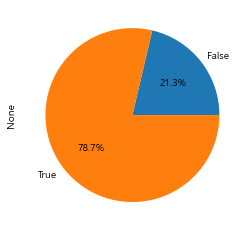

In [ ]:
df_member.real = df_member.groupby(['휴면계정여부']).size()
df_member.real.plot.pie(autopct="%.1f%%")

In [ ]:
# 휴면계정 수
cnt = 0
for a in df_member['휴면계정여부']:
  if a == True:
    cnt += 1

print(cnt)

52956


In [ ]:
# csv로 저장
df_member.to_csv('member_휴면계정.csv', encoding='utf-8-sig')